# Лабораторна робота 4
## ФБ-24 Воровська Єва

### Хід виконання роботи

В ході виконання лабораторної роботи необхідно оцінити час виконання поставленого завдання із використанням масивів (numpy array) та фреймів (pandas dataframe). \
Для кожної із структур даних потрібно виконати профілювання часу виконання (використайте timeit із однойменного модуля). \
Дана лабораторна робота містить два рівні завдань, перший простий, другий ускладнений. Вам необхідно вибрати один із них та виконати.

In [10]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import timeit
import pandas as pd
import numpy
import os
# ^ Завантаження бібліотек ^

# Папка для даних
if not os.path.exists("csv_folder"):
    os.makedirs("csv_folder")

In [2]:
###################
# Перший рівень
###################
try:
    # Читання даних з файлу / Створення датафрейму
    df = pd.read_csv(os.path.join("csv_folder", "lab4_file_1.txt"), sep=";", index_col=False, low_memory=False, header=0)
    # Відкидання відсутніх даних (NaN / ?)
    df.replace("?", None, inplace=True)
    df.dropna(inplace=True)
    df = df.reset_index(drop=True)
    for col in df.columns:
        if str(col) != "Date" and str(col) != "Time":
            df = df.astype({str(col): float})
    print(df.head())
except Exception as e:
    print("Something went wrong...")
    print(e)

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


In [3]:
###################
# Другий рівень
###################
try:
    # Читання даних з файлу / Створення датафрейму
    df_2 = pd.read_excel(os.path.join("csv_folder", "lab4_file_2.xlsx"), index_col=False, header=0)
    df_2 = df_2.reset_index(drop=True)
    print(df_2.head())
except Exception as e:
    print("Something went wrong...")
    print(e)

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000 

### Перший рівень

1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.

In [23]:
def task1():
    return df[df["Global_active_power"] > 5]["Global_active_power"]
print(task1())
print("Time:", timeit.Timer("task1()", "from __main__ import task1").timeit(number=10))

print("-"*38)

def task1_np():
    return df[numpy.array(df["Global_active_power"] > 5)]["Global_active_power"]
print(task1_np())
print("Time (numpy):", timeit.Timer("task1_np()", "from __main__ import task1_np").timeit(number=10))

1          5.360
2          5.374
3          5.388
11         5.412
12         5.224
           ...  
2043377    5.408
2043378    5.528
2045607    5.172
2045608    5.750
2047018    5.074
Name: Global_active_power, Length: 17547, dtype: float64
Time: 0.1438501999946311
--------------------------------------
1          5.360
2          5.374
3          5.388
11         5.412
12         5.224
           ...  
2043377    5.408
2043378    5.528
2045607    5.172
2045608    5.750
2047018    5.074
Name: Global_active_power, Length: 17547, dtype: float64
Time (numpy): 0.10799089993815869


2. Обрати всі домогосподарства, у яких вольтаж перевищує 235 В.

In [25]:
def task2():
    return df[df["Voltage"] > 235]["Voltage"]
print(task2())
print("Time:", timeit.Timer("task2()", "from __main__ import task2").timeit(number=10))

print("-"*38)

def task2_np():
    return df[numpy.array(df["Voltage"] > 235)]["Voltage"]
print(task2_np())
print("Time (numpy):", timeit.Timer("task2_np()", "from __main__ import task2_np").timeit(number=10))

4          235.68
5          235.02
6          235.09
7          235.22
14         235.24
            ...  
2049275    240.43
2049276    240.00
2049277    239.82
2049278    239.70
2049279    239.55
Name: Voltage, Length: 1952491, dtype: float64
Time: 2.103378799976781
--------------------------------------
4          235.68
5          235.02
6          235.09
7          235.22
14         235.24
            ...  
2049275    240.43
2049276    240.00
2049277    239.82
2049278    239.70
2049279    239.55
Name: Voltage, Length: 1952491, dtype: float64
Time (numpy): 2.061685899971053


3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

In [28]:
def task3():
    return df[(19 <= df["Global_intensity"]) & (df["Global_intensity"] <= 20) & (df["Sub_metering_2"] > df["Sub_metering_3"])][["Global_intensity", "Sub_metering_2", "Sub_metering_3"]]
print(task3())
print("Time:", timeit.Timer("task3()", "from __main__ import task3").timeit(number=10))

print("-"*38)

def task3_np():
    return df[numpy.array((19 <= df["Global_intensity"]) & (df["Global_intensity"] <= 20) & (df["Sub_metering_2"] > df["Sub_metering_3"]))][["Global_intensity", "Sub_metering_2", "Sub_metering_3"]]
print(task3_np())
print("Time (numpy):", timeit.Timer("task3_np()", "from __main__ import task3_np").timeit(number=10))

         Global_intensity  Sub_metering_2  Sub_metering_3
45                   19.0            37.0            16.0
460                  19.6            13.0             0.0
464                  19.6            27.0             0.0
475                  19.4            36.0             0.0
476                  19.4            35.0             0.0
...                   ...             ...             ...
2045610              19.8            39.0            17.0
2045611              19.8            39.0            18.0
2045612              19.4            40.0            17.0
2045613              19.0            39.0            17.0
2045614              19.4            39.0            17.0

[2509 rows x 3 columns]
Time: 0.2809912000084296
--------------------------------------
         Global_intensity  Sub_metering_2  Sub_metering_3
45                   19.0            37.0            16.0
460                  19.6            13.0             0.0
464                  19.6            27.0

4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії.

In [59]:
np_random = numpy.random.choice(df.index, 500000, replace=True)
df_loc = df.loc[np_random]

def task4():
    avg = df_loc[["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]].mean()
    return avg
print(task4())
print("Time:", timeit.Timer("task4()", "from __main__ import task4").timeit(number=10))

print("-"*38)

def task4_np():
    avg = numpy.mean(df_loc[["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]].values, axis=0)
    return avg
print(task4_np())
print("Time (numpy):", timeit.Timer("task4_np()", "from __main__ import task4_np").timeit(number=10))

Sub_metering_1    1.124492
Sub_metering_2    1.305520
Sub_metering_3    6.461766
dtype: float64
Time: 0.1867167999735102
--------------------------------------
[1.124492 1.30552  6.461766]
Time (numpy): 0.1794962000567466


5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.

In [60]:
def task5():
    df_chosen = df[((df["Time"] > "18:00:00") & (df["Global_active_power"] > 6)) & ((df["Sub_metering_2"] > df["Sub_metering_1"]) & (df["Sub_metering_2"] > df["Sub_metering_3"]))]
    first_half = df_chosen.head(len(df_chosen) // 2)
    second_half = df_chosen.tail(len(df_chosen) // 2)
    a = first_half.iloc[::3, :][["Time", "Global_active_power", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]]
    b = second_half.iloc[::4, :][["Time", "Global_active_power", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]]
    return a, b
print(task5()[0], "<>"*38, "First half /\ ", "Second half \/", "<>"*38, task5()[1], sep="\n")
print("Time:", timeit.Timer("task5()", "from __main__ import task5").timeit(number=10))

print()
print("~"*76)
print()

def task5_np():
    df_chosen = df[numpy.array(((df["Time"] > "18:00:00") & (df["Global_active_power"] > 6)) & ((df["Sub_metering_2"] > df["Sub_metering_1"]) & (df["Sub_metering_2"] > df["Sub_metering_3"])))]
    first_half = df_chosen.head(len(df_chosen) // 2)
    second_half = df_chosen.tail(len(df_chosen) // 2)
    a = first_half.iloc[::3, :][["Time", "Global_active_power", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]]
    b = second_half.iloc[::4, :][["Time", "Global_active_power", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]]
    return a, b
print(task5_np()[0], "<>"*38, "First half /\ ", "Second half \/", "<>"*38, task5_np()[1], sep="\n")
print("Time (numpy):", timeit.Timer("task5_np()", "from __main__ import task5_np").timeit(number=10))

            Time  Global_active_power  Sub_metering_1  Sub_metering_2  \
41      18:05:00                6.052             0.0            37.0   
44      18:08:00                6.308             0.0            36.0   
17492   20:58:00                6.386             1.0            36.0   
17496   21:02:00                8.088             1.0            72.0   
17499   21:05:00                7.230             1.0            73.0   
...          ...                  ...             ...             ...   
662967  20:30:00                6.952             0.0            72.0   
662970  20:33:00                6.490             0.0            72.0   
662973  20:36:00                6.708             0.0            73.0   
703316  21:00:00                8.268             1.0            72.0   
703319  21:03:00                7.798             1.0            71.0   

        Sub_metering_3  
41                17.0  
44                17.0  
17492             17.0  
17496             17.0 

Виконати всі завдання, використовуючи як numpy array, так і dataframe, проаналізувати часові витрати на виконання процедур (профілювання часу виконання), зробити висновки щодо ситуацій, в яких має сенс віддати перевагу тій чи іншій структурі даних. \
Висновки оформити звітом із зазначеним часом виконання та оцінкою по 5-бальній шкалі зручності виконання операцій відбору).

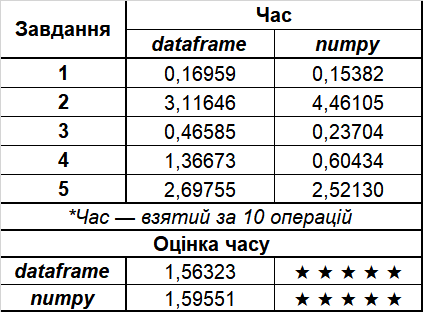

**Висновок**: у різних ситуаціях підходить і те, і інше. Загалом, за часом numpy непогано порається з великими числами. \
*(Обидва заслуговують на 5 зірочок)*

###
---
---
---

### Другий рівень

*Використаний датасет: https://archive.ics.uci.edu/dataset/360/air+quality*

1. Поборотися із зниклими даними. Для цього в допомогу вам Медіум (https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4).

In [4]:
# У нашому випадку, NA дані виглядають як "-200"
nan_data = -200
df_2.replace(nan_data, None, inplace=True)

# Замінимо NA на попередні значення (метод ffill -- заповнення попередніми даними)
df_2 = df_2.fillna(method="ffill")

C:\Users\User\AppData\Local\Temp\ipykernel_6920\3572231858.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_2 = df_2.fillna(method="ffill")
C:\Users\User\AppData\Local\Temp\ipykernel_6920\3572231858.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2 = df_2.fillna(method="ffill")


2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

In [6]:
ndf = df_2.copy()
# Нормалізація
for col in ndf.columns: 
    if col != "Date" and col != "Time":
        ndf[col] = (ndf[col] - ndf[col].min()) / (ndf[col].max() - ndf[col].min())
print(ndf.head())

        Date      Time    CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0 2004-03-10  18:00:00  0.211864     0.511849  0.120981  0.184498   
1 2004-03-10  19:00:00  0.161017     0.463196  0.088832  0.145428   
2 2004-03-10  20:00:00  0.177966     0.542011  0.068528  0.139148   
3 2004-03-10  21:00:00  0.177966     0.522980  0.061760  0.142780   
4 2004-03-10  22:00:00  0.127119     0.448833  0.037225  0.100156   

   PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0       0.361737  0.111036      0.311024  0.328694      0.513040     0.454654   
1       0.312167  0.068382      0.360796  0.266509      0.453125     0.326382   
2       0.303701  0.087339      0.346500  0.331655      0.451214     0.370588   
3       0.308617  0.115098      0.326168  0.355345      0.464366     0.426741   
4       0.247030  0.087339      0.374034  0.337578      0.422212     0.386228   

          T        RH        AH  
0  0.333333  0.499057  0.280046  
1  0.326882  0.484287  0.26427

3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

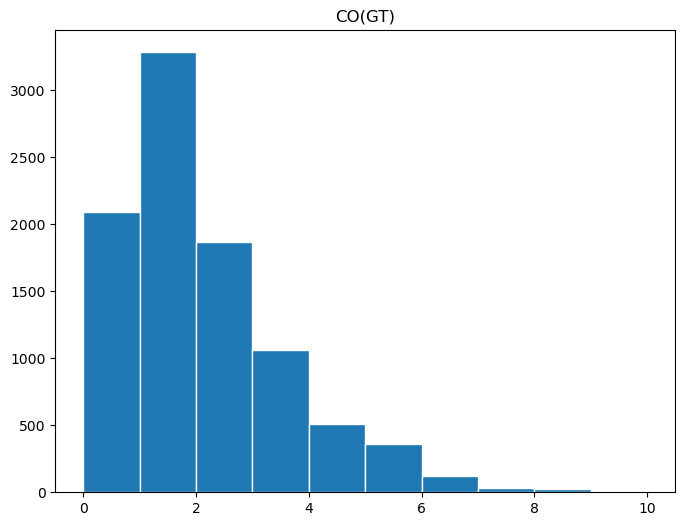

In [7]:
col_hist = "CO(GT)"
diap = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure(figsize=(8, 6))
plt.hist(df_2[col_hist], bins=diap, edgecolor="white")
plt.title(col_hist)
plt.show()

4. Збудувати графік залежності одного integer/real атрибута від іншого.

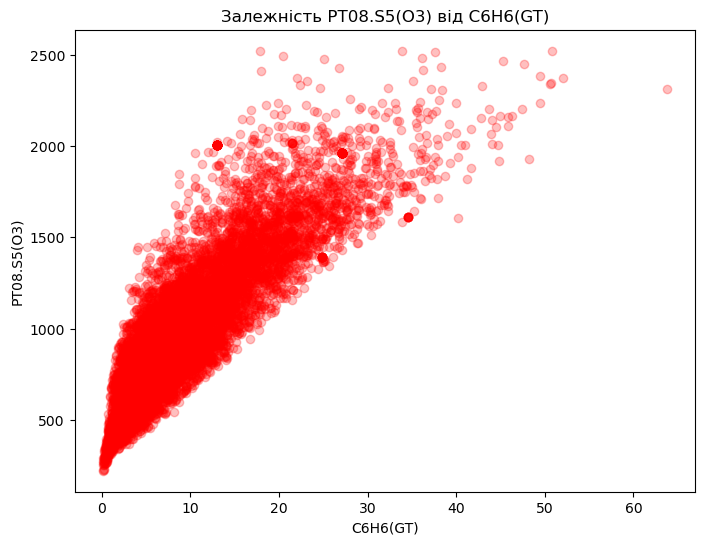

In [8]:
y_label = "PT08.S5(O3)"
x_label = "C6H6(GT)"
plt.figure(figsize=(8, 6))
plt.scatter(x=df_2[x_label], y=df_2[y_label], color="red", alpha=0.25)
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.title(f"Залежність {y_label} від {x_label}")
plt.show()

5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів.

In [9]:
a = "PT08.S5(O3)"
b = "C6H6(GT)"
pears = stats.pearsonr(df_2[a], df_2[b])
spear = stats.spearmanr(df_2[a], df_2[b])
print(f"Коефіцієнти між {a} та {b}:")
print("Pearson:", pears.statistic)
print("Spearman:", spear.statistic)

Коефіцієнти між PT08.S5(O3) та C6H6(GT):
Pearson: 0.861701492269633
Spearman: 0.8750365015260189


6. Провести One Hot Encoding категоріального string атрибуту.

In [19]:
df_to_enc = df_2.copy()
col_enc = "CO(GT)"

print(">>> ДО <<<")
print(df_to_enc[[col_enc]].head(30))

encoder = OneHotEncoder()
df_to_enc[col_enc+"_NEW"] = pd.cut(df_to_enc[col_enc], bins=[0, 5, 10, float("inf")], labels=["1", "2", "3"])
enc_data = encoder.fit_transform(df_to_enc[[col_enc+"_NEW"]])
enc_df = pd.DataFrame(enc_data.toarray(), columns=encoder.categories_[0])
fin_df = pd.concat([df_to_enc, enc_df], axis=1)

print("~"*40)

print(">>> ПІСЛЯ <<<")
print(fin_df[[col_enc, col_enc+"_NEW", "1", "2", "3"]].head(30))

>>> ДО <<<
    CO(GT)
0      2.6
1      2.0
2      2.2
3      2.2
4      1.6
5      1.2
6      1.2
7      1.0
8      0.9
9      0.6
10     0.6
11     0.7
12     0.7
13     1.1
14     2.0
15     2.2
16     1.7
17     1.5
18     1.6
19     1.9
20     2.9
21     2.2
22     2.2
23     2.9
24     4.8
25     6.9
26     6.1
27     3.9
28     1.5
29     1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
>>> ПІСЛЯ <<<
    CO(GT) CO(GT)_NEW    1    2    3
0      2.6          1  1.0  0.0  0.0
1      2.0          1  1.0  0.0  0.0
2      2.2          1  1.0  0.0  0.0
3      2.2          1  1.0  0.0  0.0
4      1.6          1  1.0  0.0  0.0
5      1.2          1  1.0  0.0  0.0
6      1.2          1  1.0  0.0  0.0
7      1.0          1  1.0  0.0  0.0
8      0.9          1  1.0  0.0  0.0
9      0.6          1  1.0  0.0  0.0
10     0.6          1  1.0  0.0  0.0
11     0.7          1  1.0  0.0  0.0
12     0.7          1  1.0  0.0  0.0
13     1.1          1  1.0  0.0  0.0
14     2.0          1  1.0  0.0  0.0
1

7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі -https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

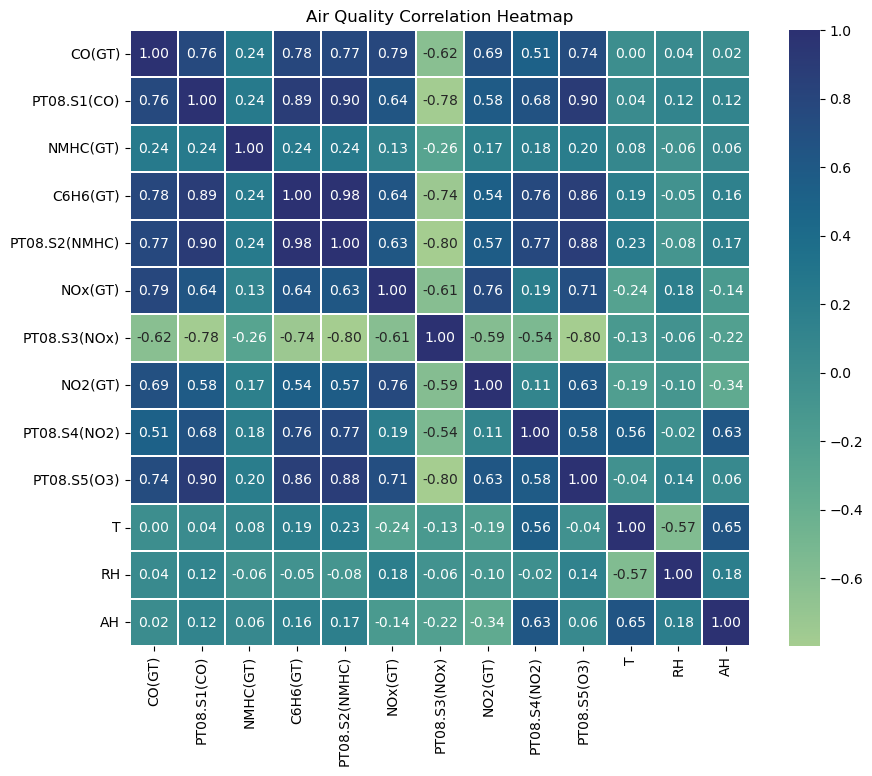

In [20]:
df_corr = df_2.copy()
df_corr = df_corr.drop(["Date", "Time"], axis=1)
corr_map = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_map, annot=True, cmap="crest", fmt=".2f", linewidths=0.05)
plt.title("Air Quality Correlation Heatmap")
plt.show()